In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [4]:
path = './'
orderlines = pd.read_csv(path + 'orderlines_cl.csv')
orders = pd.read_csv(path + 'orders_cl.csv')
brands = pd.read_csv(path + 'brands_cl.csv')
products = pd.read_csv(path + 'products_cl.csv')

In [5]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [6]:
import numpy as np

In [7]:
p_df1 = (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    .merge(products, how='left')
    .assign(price = lambda x: np.where(np.isnan(x['price']), x['max_price_orderlines'], x['price']))
    .assign(disc = lambda x: x['price'] - x['unit_price'],
           disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100), 
           year_month = lambda x: x['date'].dt.to_period('M'))
    #.groupby(['year_month'])
   # .agg({'disc_perc':'mean'})
    #.reset_index()
)


In [8]:
p_df1

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders_x,order_id,...,total_paid,state,check_orders_y,name,desc,price,max_price_orderlines,disc,disc_perc,year_month
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,299545,...,51.48,Completed,True,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,NaN,13.50,22.00,2017-01
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,True,299546,...,18.99,Completed,True,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,NaN,3.96,17.00,2017-01
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,True,295347,...,72.19,Completed,True,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,NaN,16.81,19.00,2017-01
3,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,True,299549,...,2565.99,Completed,True,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,NaN,643.01,20.00,2017-01
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,True,299556,...,65.89,Completed,True,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,NaN,16.09,21.00,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,True,525664,...,85.73,Completed,True,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,NaN,8.47,34.00,2018-03
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,True,527070,...,24.97,Completed,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,NaN,15.01,60.00,2018-03
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,True,527074,...,24.97,Completed,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,NaN,15.01,60.00,2018-03
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,True,527096,...,34.96,Completed,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,NaN,15.01,60.00,2018-03


In [9]:
import re

In [10]:
regexp_dict = {
    'wacom':'(wacom|Wacom)',
    'Macbook':'(Macbook|macbook)',
    'Ipad':'(IPad|iPad)',
    'iPhone':'(iPhone|IPhone)',
    'headset':'(headset|headphones|Headset)',
    'memory':'(memory)',
    'hard drive':'(hard drive|Hard drive)',
    'protect':'(protect|cover|sleeve|Screensaver|shell)',
    'watch':'(^.{0,6}apple watch|smartwatch|smart watch|Apple watch|Watch)',
    'monitor':'(Monitor|monitor)',
    'iMac':'(iMac|IMac)',
    'Mac mini':'Mac mini|mac mini',
    'USB':'USB',
    'Others':''
}

temp = products.copy().assign(category = 'unknown')


for val in regexp_dict.items(): 
    label = val[0]
    regexp = re.compile(val[1], flags=re.IGNORECASE)
    temp = (
    temp
        .assign(
            category = lambda x: np.where(
                (x['desc'].str.contains(regexp, regex=True)) &
                (x['category'] == 'unknown'), label, x['category'])))

temp['category'].value_counts()

/Users/sevgiakdeniz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Others        2179
iPhone        2102
Ipad          1639
Macbook       1441
iMac           708
hard drive     687
USB            514
memory         370
watch          320
monitor        242
protect        198
Mac mini       128
headset         25
wacom           19
unknown          7
Name: category, dtype: int64

In [11]:
products = products.merge(temp, how='left')

In [12]:
products.columns

Index(['sku', 'name', 'desc', 'price', 'max_price_orderlines', 'category'], dtype='object')

In [13]:
d = orderlines.merge(orders, how='left', left_on='id_order', right_on='order_id').query('state == "Completed"').merge(products, how='left').assign(price = lambda x: np.where(np.isnan(x['price']), x['max_price_orderlines'], x['price'])).assign(disc = lambda x: x['price'] - x['unit_price'],
disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100), year_month = lambda x: x['date'].dt.to_period('M'))

In [14]:
e = d.groupby(['category']).agg({'product_quantity':'sum', 'total_price':'sum', 'disc':'mean', 'disc_perc':'mean'}).reset_index().sort_values('disc', ascending = False).reset_index()

In [15]:
e

,index,category,product_quantity,total_price,disc,disc_perc
0,7,iMac,2717,2947176.34,194.31,17.83
1,1,Mac mini,483,232369.21,60.05,13.15
2,10,monitor,2001,821671.18,58.00,12.10
3,2,Macbook,11437,3966248.32,47.89,18.20
4,13,wacom,214,38592.51,45.22,11.48
5,9,memory,1045,230144.11,33.35,13.35
6,5,hard drive,6831,1166897.72,32.43,17.18
7,3,Others,12330,1854046.00,29.52,19.90
8,0,Ipad,11881,1213410.40,26.99,28.66
9,4,USB,4505,456811.43,23.68,21.28


In [16]:
p_df1.disc.mean()

37.68425966116722

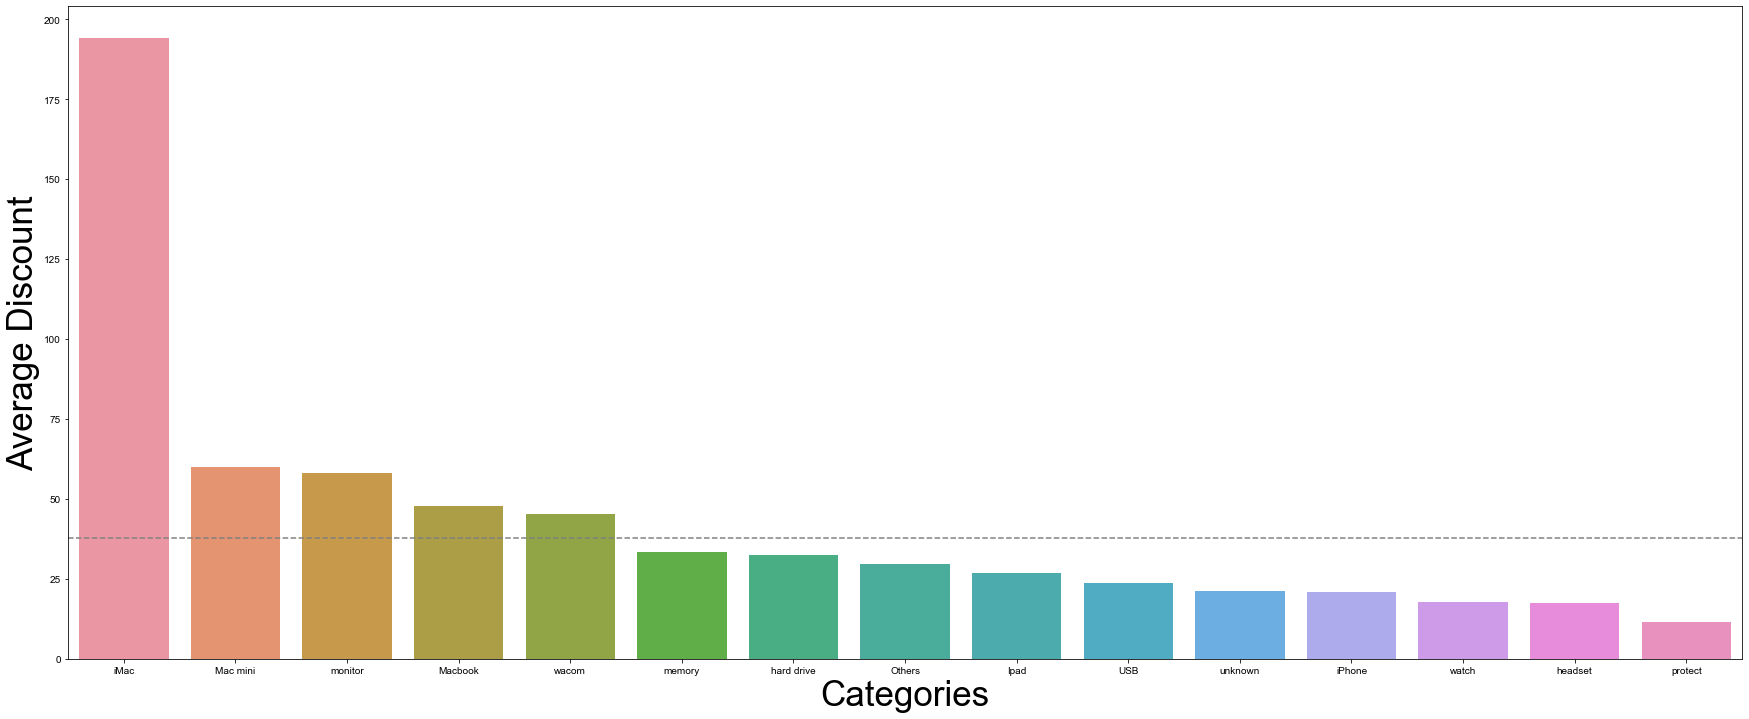

In [17]:
plt.subplots(figsize=(30, 12))

p = sns.barplot(data=e, x='category', y='disc')

p.axhline(p_df1['disc'].mean(), linestyle='--', color='gray')

plt.xlabel('Categories', fontsize=35)
plt.ylabel('Average Discount', fontsize=35)
#plt.title('Average Discount by Categories', fontsize=45)
sns.set_style('dark')
sns.set_context('talk', font_scale=1.5)





plt.show()

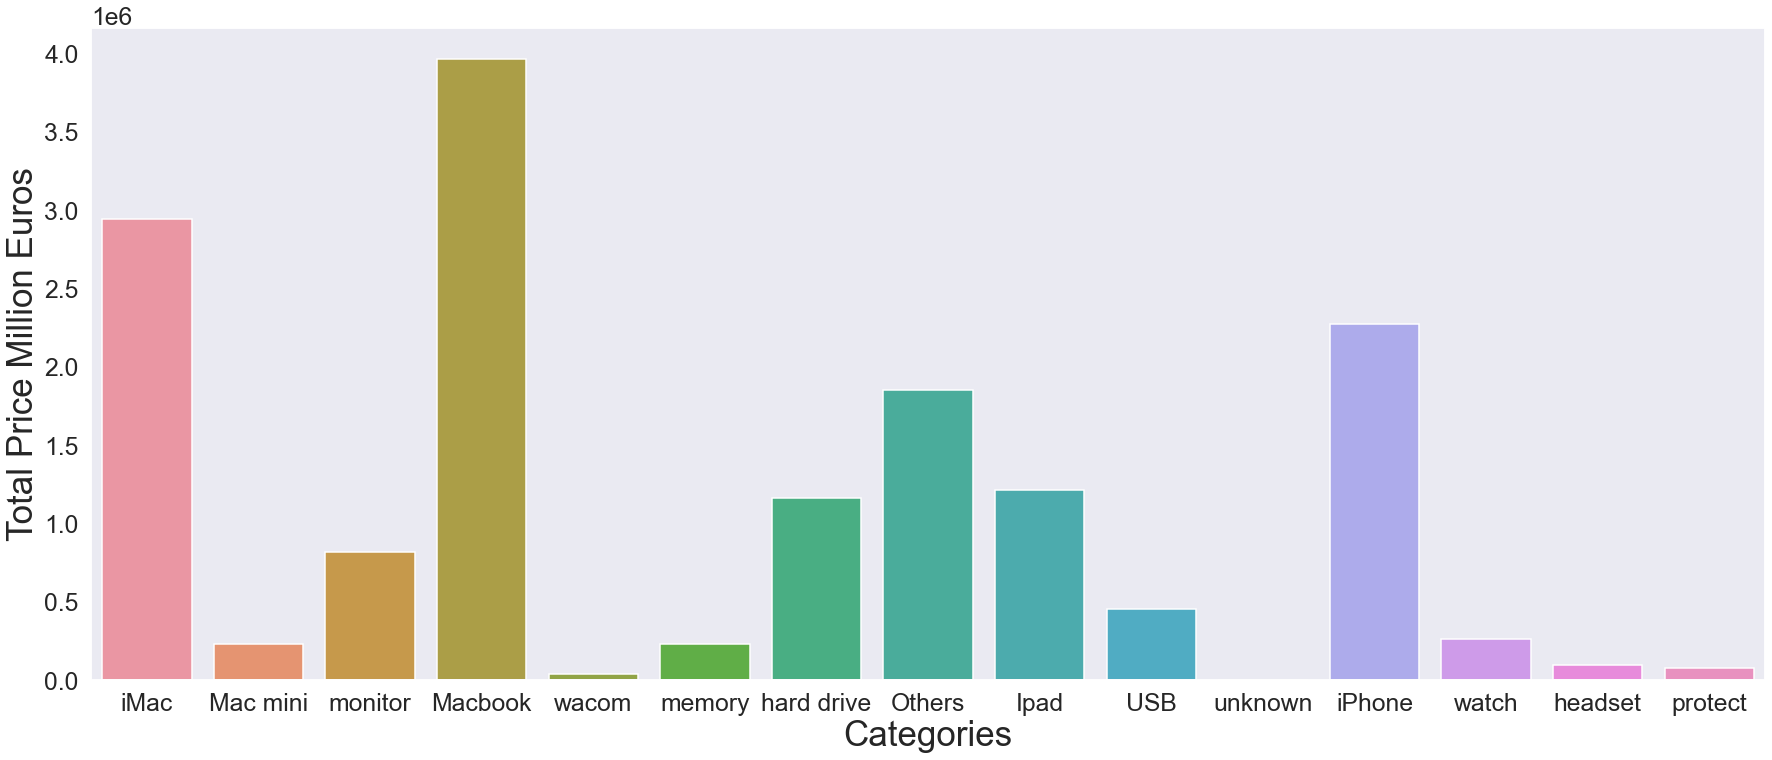

In [18]:
plt.subplots(figsize=(30, 12))

sns.barplot(data=e, x='category', y='total_price')
plt.xlabel('Categories', fontsize=35)
plt.ylabel('Total Price Million Euros', fontsize=35)
#plt.title('Total Price by Categories', fontsize=45)
sns.set_style('dark')
sns.set_context('talk', font_scale=1.5)
plt.show()

In [19]:
p_df2 = (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    #.query('state == "Completed"')
    .merge(products, how='left')
    .assign(price = lambda x: np.where(np.isnan(x['price']), x['max_price_orderlines'], x['price']))
    .assign(disc = lambda x: x['price'] - x['unit_price'],
           disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100), 
           year_month = lambda x: x['date'].dt.to_period('M')))

In [20]:
sta = p_df2.groupby('state').agg({'disc':['mean', 'median', 'sum'], 'total_price':'sum', 'product_quantity':'sum'}).reset_index()

In [21]:
sta

state  disc                   total_price product_quantity
                    mean median        sum         sum              sum
0        Cancelled 62.59  20.00  564280.64  5525459.62            10034
1        Completed 37.68  15.91 2326701.56 15709704.82            69631
2          Pending 35.79  15.00  665332.70  4675847.09            20723
3      Place Order 46.67  15.12 1604133.13 17013355.86            38243
4  Shopping Basket 56.97  16.00 9605624.31 85735026.38           190680

In [22]:
sta2 = p_df2.groupby(['state', 'year_month'])['disc'].mean().reset_index()

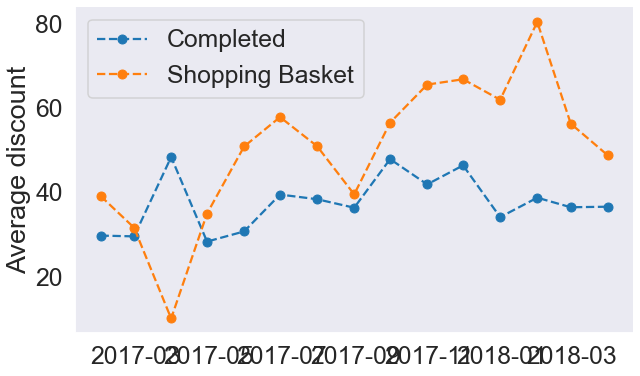

In [23]:
f, ax = plt.subplots(figsize=(10, 6))

#plt.plot_date(data=sta2.query('state == "Cancelled"'), x='year_month', y='disc', linestyle='--', label='Cancelled')
plt.plot_date(data=sta2.query('state == "Completed"'), x='year_month', y='disc', linestyle='--', label='Completed')
#plt.plot_date(data=sta2.query('state == "Pending"'), x='year_month', y='disc', linestyle='--', label='Pending')
#plt.plot_date(data=sta2.query('state == "Place Order"'), x='year_month', y='disc', linestyle='--', label='Place Order')
plt.plot_date(data=sta2.query('state == "Shopping Basket"'), x='year_month', y='disc', linestyle='--', label='Shopping Basket')
ax.legend()

#plt.title('Evolution of discounts % overtime')
plt.ylabel('Average discount')
sns.despine()
plt.show()

In [24]:
sta3 = p_df2.groupby(['state', 'year_month'])['total_price'].sum().reset_index()

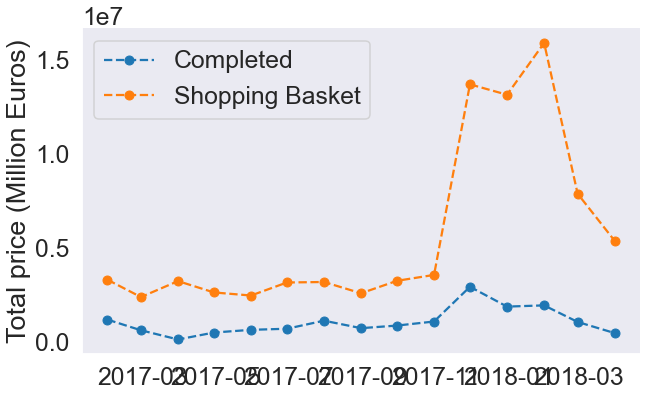

In [25]:
f, ax = plt.subplots(figsize=(10, 6))

#plt.plot_date(data=sta3.query('state == "Cancelled"'), x='year_month', y='total_price', linestyle='--', label='Cancelled')
plt.plot_date(data=sta3.query('state == "Completed"'), x='year_month', y='total_price', linestyle='--', label='Completed')
#plt.plot_date(data=sta3.query('state == "Pending"'), x='year_month', y='total_price', linestyle='--', label='Pending')
#plt.plot_date(data=sta3.query('state == "Place Order"'), x='year_month', y='total_price', linestyle='--', label='Place Order')
plt.plot_date(data=sta3.query('state == "Shopping Basket"'), x='year_month', y='total_price', linestyle='--', label='Shopping Basket')
ax.legend()

#plt.title('Evolution of total_price overtime')
plt.ylabel('Total price (Million Euros)')
sns.despine()
plt.show()

In [25]:
p_df1.disc.sum()

2326701.5599999996

In [24]:
p_df1.price.sum()

17158715.33

In [89]:
p_df1.product_quantity.sum()

69631

In [25]:
p_df1.disc.sum() / 17158715.33

0.13559882049747835

In [26]:
##TOTAL REVENUE

In [27]:
p_df1.total_price.sum()

15709704.819999998

In [28]:
## total product quantity of completed orders

In [29]:
p_df1.loc[p_df1.disc > 0]['product_quantity'].sum()

63944

In [35]:
top_500 = p_df1.groupby(['name', 'sku']).agg({'product_quantity':'sum', 'total_price':'sum', 'disc':'sum'}).reset_index().sort_values('total_price', ascending = False).head(500)

In [36]:
top_500['total_price'].sum()

10880709.92

In [37]:
top_500['total_price'].sum() * 100 / p_df1['total_price'].sum()

69.26107170484697

In [38]:
top_500['disc'].sum() * 100 / p_df1.disc.sum()

55.301129380770284

In [39]:
p_df1['total_price'].sum()

15709704.819999998

In [90]:
top_500['disc'].sum()

1286692.2400000002